###Carregando Bibliotecas

In [1]:
import matplotlib.pyplot as plt

from keras.models import Sequential, load_model

from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model

import numpy as np
import pandas as pd

from keras.callbacks import ModelCheckpoint

###Carregando dataset

In [2]:
!rm -rf fruits-360/

In [3]:
!git clone https://github.com/MicaelCosta/fruits-360.git

Cloning into 'fruits-360'...
remote: Enumerating objects: 80872, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 80872 (delta 0), reused 8 (delta 0), pack-reused 80864
Receiving objects: 100% (80872/80872), 344.13 MiB | 25.29 MiB/s, done.
Checking out files: 100% (90752/90752), done.


###Pré-processamento

In [35]:
shape_images = (100, 100)

In [62]:
train_datagen = ImageDataGenerator(validation_split=0.30)

train_generator = train_datagen.flow_from_directory(
    'fruits-360/fruits-full/train',
    batch_size=300,
    color_mode="grayscale",
    subset="training",
    target_size=shape_images)

Found 42388 images belonging to 120 classes.


In [63]:
val_generator = train_datagen.flow_from_directory(
    'fruits-360/fruits-full/test',
    batch_size=300,
    color_mode="grayscale",
    subset="validation",
    target_size=shape_images)

Found 6127 images belonging to 120 classes.


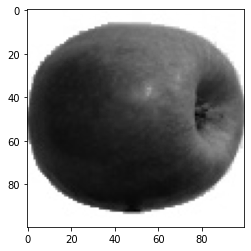

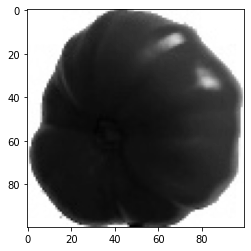

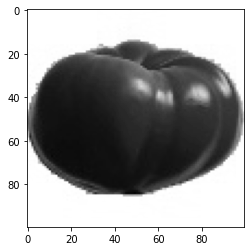

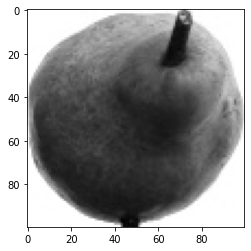

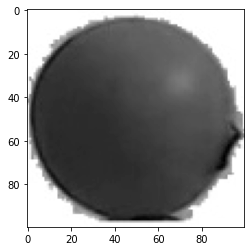

In [64]:
x,y = train_generator.next()
for i in range(0,5):
  image = x[i]
  plt.imshow(image[:,:,0], cmap=plt.get_cmap('gray'))
  plt.show()

In [65]:
x.shape

(300, 100, 100, 1)

In [66]:
train_generator.class_indices, val_generator.class_indices

({'Apple Braeburn': 0,
  'Apple Crimson Snow': 1,
  'Apple Golden 1': 2,
  'Apple Golden 2': 3,
  'Apple Golden 3': 4,
  'Apple Granny Smith': 5,
  'Apple Pink Lady': 6,
  'Apple Red 1': 7,
  'Apple Red 2': 8,
  'Apple Red 3': 9,
  'Apple Red Delicious': 10,
  'Apple Red Yellow 1': 11,
  'Apple Red Yellow 2': 12,
  'Apricot': 13,
  'Avocado': 14,
  'Avocado ripe': 15,
  'Banana': 16,
  'Banana Lady Finger': 17,
  'Banana Red': 18,
  'Beetroot': 19,
  'Blueberry': 20,
  'Cactus fruit': 21,
  'Cantaloupe 1': 22,
  'Cantaloupe 2': 23,
  'Carambula': 24,
  'Cauliflower': 25,
  'Cherry 1': 26,
  'Cherry 2': 27,
  'Cherry Rainier': 28,
  'Cherry Wax Black': 29,
  'Cherry Wax Red': 30,
  'Cherry Wax Yellow': 31,
  'Chestnut': 32,
  'Clementine': 33,
  'Cocos': 34,
  'Dates': 35,
  'Eggplant': 36,
  'Ginger Root': 37,
  'Granadilla': 38,
  'Grape Blue': 39,
  'Grape Pink': 40,
  'Grape White': 41,
  'Grape White 2': 42,
  'Grape White 3': 43,
  'Grape White 4': 44,
  'Grapefruit Pink': 45,
  '

###Modelo CNN

In [67]:
num_classes = len(train_generator.class_indices)

STEP_SIZE_TRAIN = train_generator.n // train_generator.batch_size
STEP_SIZE_VALID = val_generator.n // val_generator.batch_size

In [68]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=5,  activation='relu', input_shape=(100, 100, 1)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=3,  activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3,  activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=3,  activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=2,  activation='relu'))
model.add(Conv2D(filters=256, kernel_size=2,  activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(num_classes, activation='softmax'))

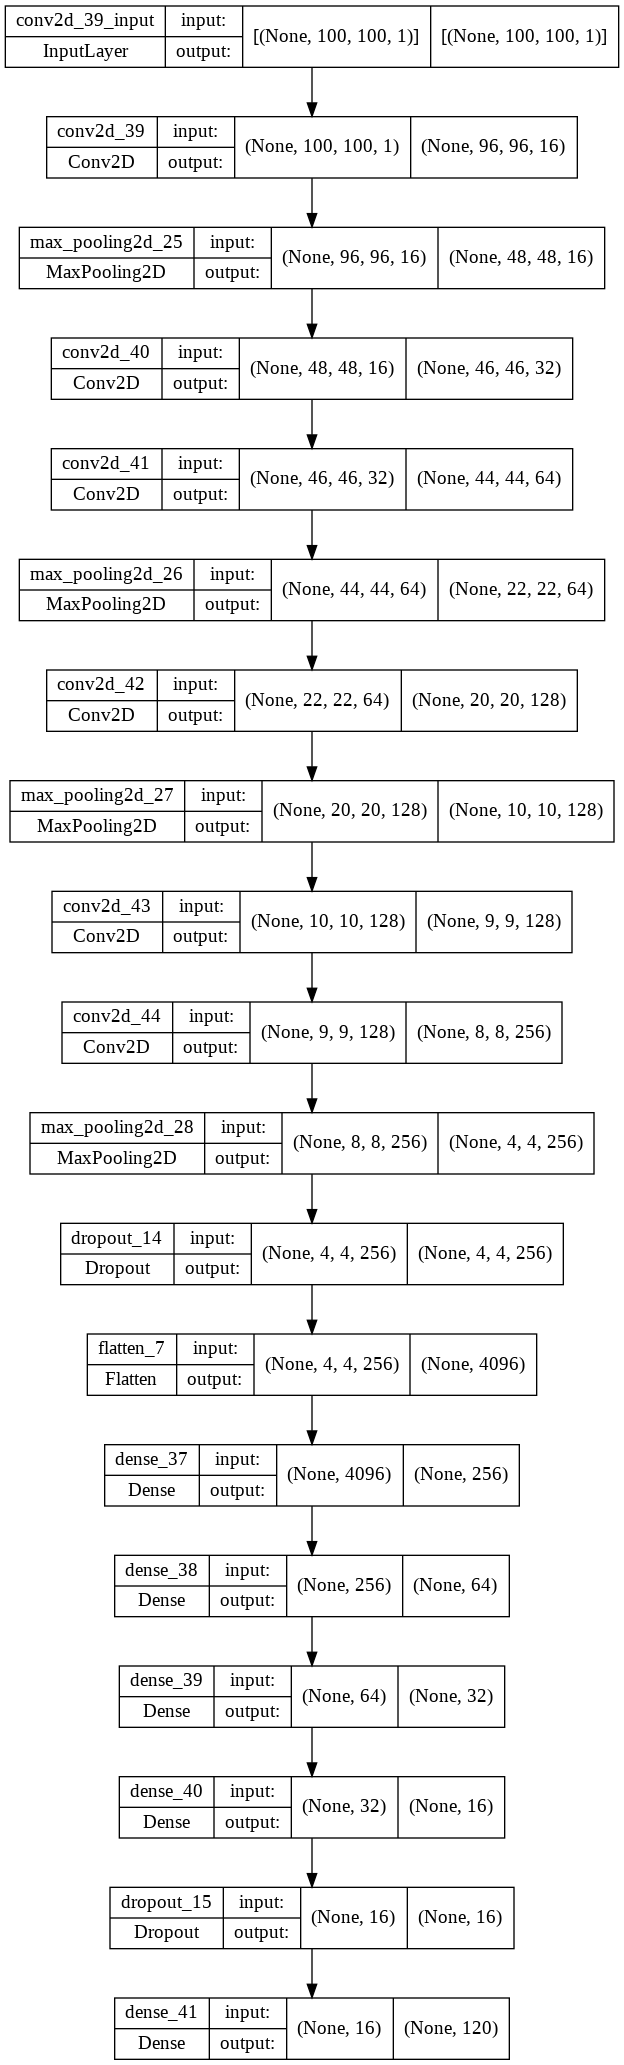

In [69]:
plot_model(model, to_file='cnn-fruits.png', show_shapes=True, show_layer_names=True)

In [70]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [71]:
checkpointer = ModelCheckpoint(filepath='cnn-fruits.hdf5', verbose=1,  save_best_only=True, monitor='val_accuracy')

history = model.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=val_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=30,
                    callbacks=[checkpointer], verbose=1, shuffle=True)

Epoch 1/30
141/141 [==============================] - ETA: 0s - loss: 4.6431 - accuracy: 0.0283
Epoch 1: val_accuracy improved from -inf to 0.04433, saving model to cnn-fruits.hdf5
141/141 [==============================] - 25s 172ms/step - loss: 4.6431 - accuracy: 0.0283 - val_loss: 4.3319 - val_accuracy: 0.0443
Epoch 2/30
141/141 [==============================] - ETA: 0s - loss: 3.8064 - accuracy: 0.0925
Epoch 2: val_accuracy improved from 0.04433 to 0.18233, saving model to cnn-fruits.hdf5
141/141 [==============================] - 24s 170ms/step - loss: 3.8064 - accuracy: 0.0925 - val_loss: 3.2432 - val_accuracy: 0.1823
Epoch 3/30
141/141 [==============================] - ETA: 0s - loss: 3.0756 - accuracy: 0.1848
Epoch 3: val_accuracy improved from 0.18233 to 0.38483, saving model to cnn-fruits.hdf5
141/141 [==============================] - 24s 169ms/step - loss: 3.0756 - accuracy: 0.1848 - val_loss: 2.3931 - val_accuracy: 0.3848
Epoch 4/30
141/141 [=============================

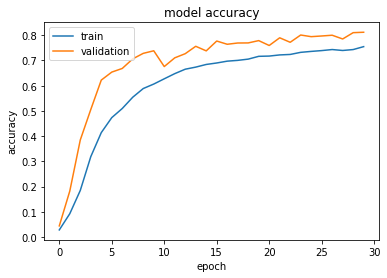

In [72]:
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [73]:
test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    'fruits-360/fruits-full/test',
    batch_size=1,
    color_mode="grayscale",
    target_size=shape_images)

Found 20622 images belonging to 120 classes.


In [74]:
scores = model.evaluate_generator(test_generator)
print('\n', 'Test accuracy:', scores[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.



 Test accuracy: 0.855785071849823
